<a href="https://colab.research.google.com/github/EnoshVechalapu/MachineLearning/blob/main/ChronicKidneyDisease_EDAandMLmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chronic Kidney Disease Prediction**





This dataset is available at https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease.

Data has 25 features which may predict a patient with chronic kidney disease.

### 1. Data Loading and Overview

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load the dataset
df = pd.read_csv('/content/kidney_disease.csv', index_col='id')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [5]:
# Check if there are any missing values
df.isna().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
# Check if there are duplicate rows
df.duplicated().sum()

0

In [7]:
# View the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


In [8]:
# View the description of the dataset
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### 2. Data Rectification

In [9]:
# Rename columns to make them more readable
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [10]:
# View the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

It can be seen that **packed_cell_volume**, **white_blood_cell_count**, and **red_blood_cell_count** are of object type. These will be converted to numerical type.

In [11]:
# Convert object type to numeric type
df['packed_cell_volume']     = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']   = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
# Print the number of unique values for each column
for col in df.columns:
    print(f'{col} has {df[col].nunique()} values')

age has 76 values
blood_pressure has 10 values
specific_gravity has 5 values
albumin has 6 values
sugar has 6 values
red_blood_cells has 2 values
pus_cell has 2 values
pus_cell_clumps has 2 values
bacteria has 2 values
blood_glucose_random has 146 values
blood_urea has 118 values
serum_creatinine has 84 values
sodium has 34 values
potassium has 40 values
hemoglobin has 115 values
packed_cell_volume has 42 values
white_blood_cell_count has 89 values
red_blood_cell_count has 45 values
hypertension has 2 values
diabetes_mellitus has 5 values
coronary_artery_disease has 3 values
appetite has 2 values
pedal_edema has 2 values
anemia has 2 values
class has 3 values


In [13]:
# Classify columns: categorical columns and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [14]:
len(cat_cols), len(num_cols)

(11, 14)

In [15]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values')

red_blood_cells has [nan 'normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal' nan] values
pus_cell_clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
coronary_artery_disease has ['no' 'yes' '\tno' nan] values
appetite has ['good' 'poor' nan] values
pedal_edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'ckd\t' 'notckd'] values


It can be seen that there are some non-standard values ​​in the categorical column, such as `\tno`, `\tyes`. We need to convert them into standard values

In [16]:
# Replace non-standard values
df['diabetes_mellitus'].replace(to_replace={'\tno':'no',
                                            '\tyes':'yes',
                                            ' yes':'yes'},
                                inplace=True)
df['coronary_artery_disease'].replace(to_replace={'\tno':'no'},
                                      inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd',
                                'notckd':'not ckd'},
                    inplace=True)

In [17]:
# Convert the 'class' column to binary numeric form (0 and 1)
df['class'] = df['class'].map({'ckd':0, 'not ckd':1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [18]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f'{col} has {df[col].unique()} values')

diabetes_mellitus has ['yes' 'no' nan] values
coronary_artery_disease has ['no' 'yes' nan] values
class has [0 1] values


In [19]:
# View the specific values in the numeric column
for col in num_cols:
    print(f'{col} has {df[col].unique()} values')

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values
blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values
specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values
albumin has [ 1.  4.  2.  3.  0. nan  5.] values
sugar has [ 0.  3.  4.  1. nan  2.  5.] values
blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 

### 3. Exploratory Data Analysis


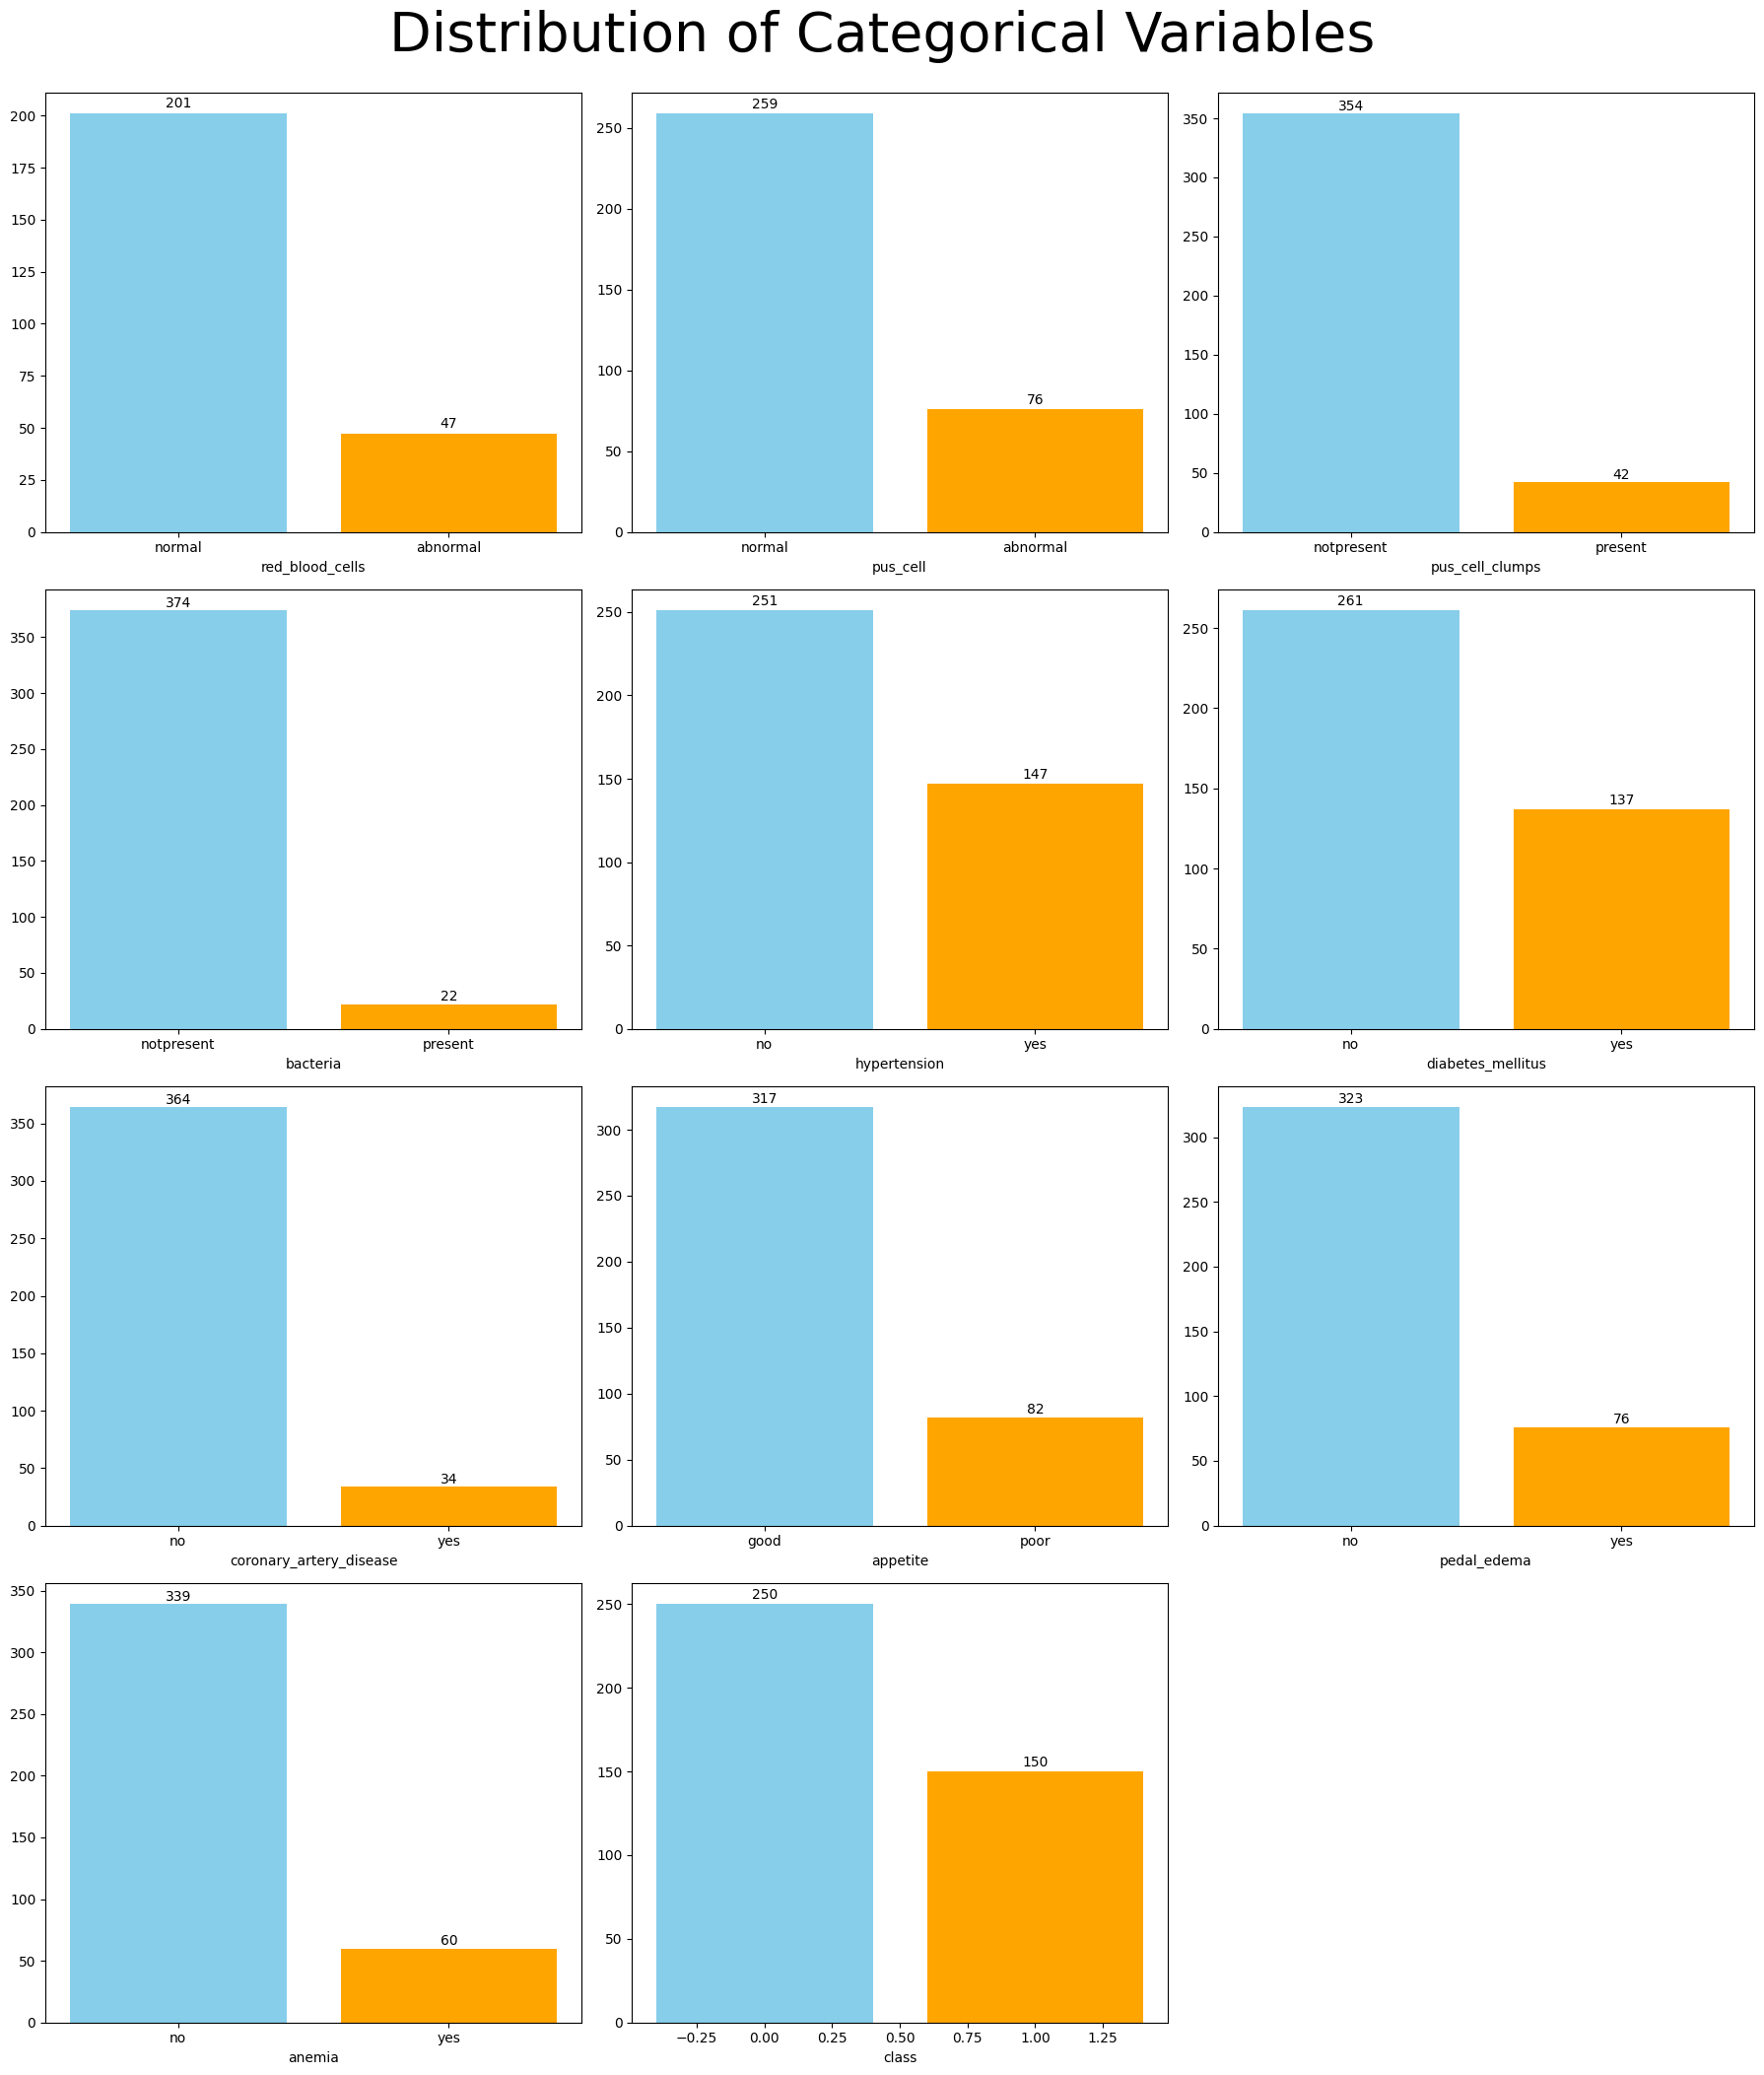

In [20]:
# Distribution of categorical variables
plt.figure(figsize=(18, 21))
plotnumber = 1

colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral', 'cyan', 'pink']

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        # sns.countplot(x=df[col], palette = 'pastel')
        counts = df[col].value_counts()
        ax.bar(counts.index, counts.values, color=colors[:len(counts)])

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{p.get_height()}', ha="center")

        plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

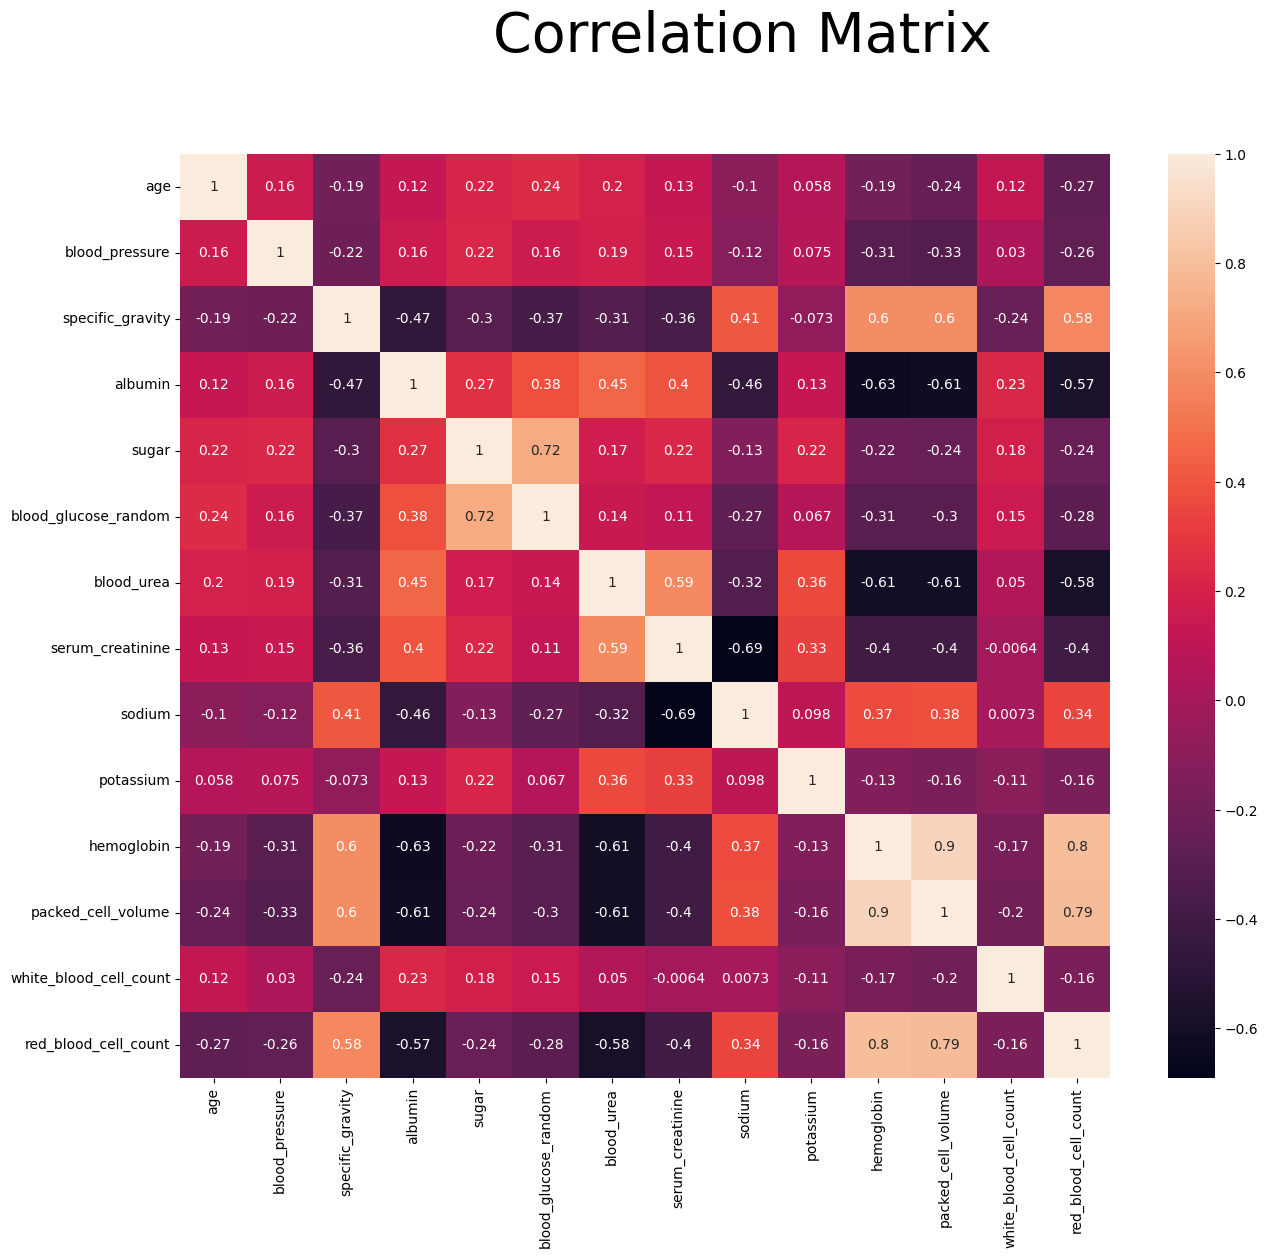

In [21]:
# Correlation matrix of numeric columns
num_df = df[num_cols]

plt.figure(figsize=(15, 12))
sns.heatmap(num_df.corr(), annot=True)
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

### 4. Missing Data Imputation

In [22]:
# Check missing values for numerical columns
df[num_cols].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

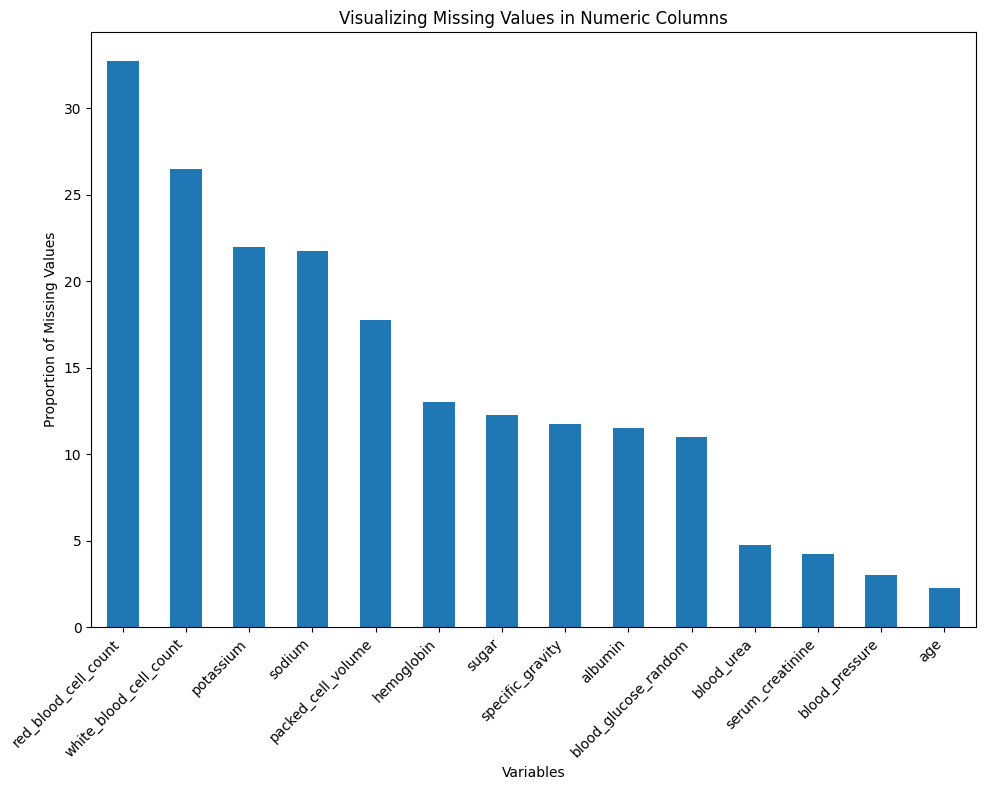

In [23]:
# Visualize missing values in numerical columns
# Count the number of missing values in each column
missing_values = (df[num_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Numeric Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# Check missing values for categorical columns
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

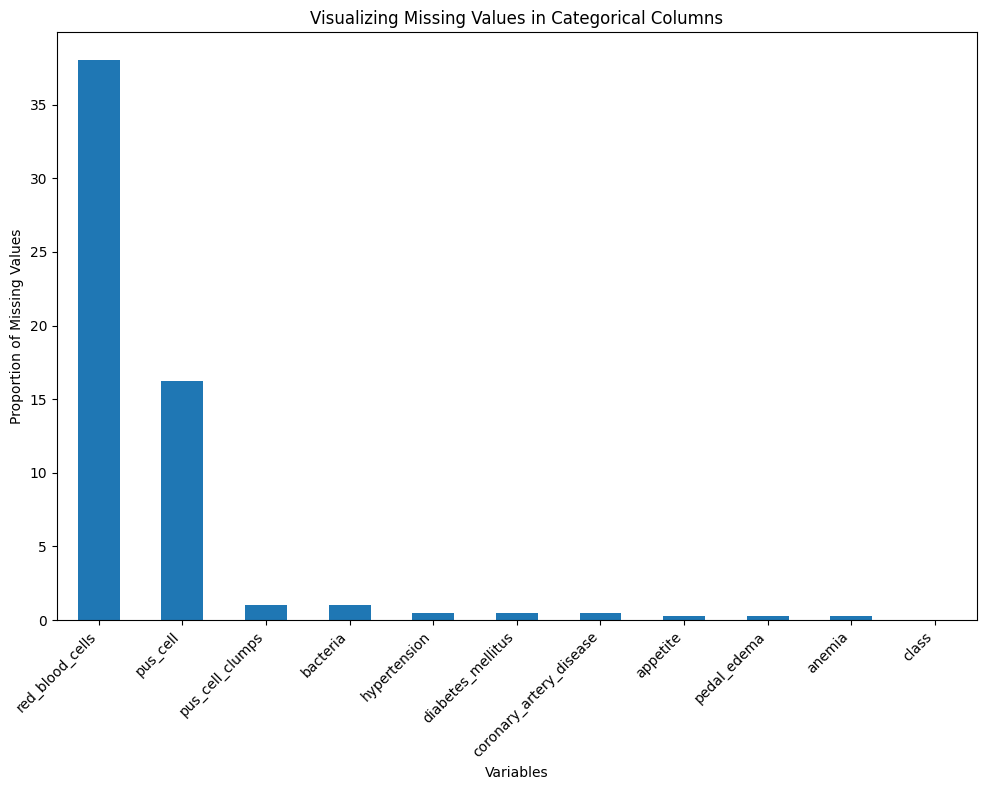

In [25]:
# Visualize missing values in categorical columns
# Count the number of missing values in each column
missing_values = (df[cat_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Categorical Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
# Fill missing values in numeric columns
# Multiple iterations of interpolation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create IterativeImputer object
imputer = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)
# Use IterativeImputer to fill in missing values
df[num_cols] = imputer.fit_transform(df[num_cols])

In [27]:
# Make sure all missing values have been filled in
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [28]:
# For feature columns with many missing values: use random values to fill in
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

# For feature columns with relatively few missing values: use the mode to fill in
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

# For the categorical columns red_blood_cells and pus_cell, use random sampling to fill
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

# For other categorical data columns, use the mode to fill
for col in cat_cols:
    impute_mode(col)

In [29]:
# Make sure all missing values have been filled in
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

### 5. Models

In [30]:
# Feature encoding (label encoding)
# Convert categories to numeric values ​​using category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [31]:
# Prepare training data
# Define independent variables
ind_col = [col for col in df.columns if col!='class']
# Define dependent variable
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

# For later use in feature importance plotting
dataframe = X

In [32]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
from sklearn.model_selection import train_test_split

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, X_train, y_train, X_test, y_test):
    """
    Train, predict, and evaluate a classifier.

    Parameters:
        classifier: The machine learning classifier to train and evaluate.
        model_name: A string representing the name of the model for display.
        X_train, y_train: Training data and labels.
        X_test, y_test: Testing data and labels.

    Returns:
        A dictionary with confusion matrix, accuracy, precision, recall, and F1 score.
    """
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Print the evaluation metrics
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")

    # Return the metrics as a dictionary
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

### **5.1 K-Nearest Neighbors (KNN)**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_name = "K-Nearest Neighbors"
knn_results = evaluate_model(knn, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of K-Nearest Neighbors: 0.93500

Confusion Matrix:
[[113  15]
 [  0  72]]

Test Accuracy of K-Nearest Neighbors: 0.92500
Test Precision of K-Nearest Neighbors: 0.91379
Test Recall of K-Nearest Neighbors: 0.94141
Test F1 Score of K-Nearest Neighbors: 0.92171

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       128
           1       0.83      1.00      0.91        72

    accuracy                           0.93       200
   macro avg       0.91      0.94      0.92       200
weighted avg       0.94      0.93      0.93       200



### **5.2 Gaussian Naive Bayes**

In [36]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model_name = "Gaussian Naive Bayes"
gnb_results = evaluate_model(gnb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Gaussian Naive Bayes: 0.94000

Confusion Matrix:
[[115  13]
 [  0  72]]

Test Accuracy of Gaussian Naive Bayes: 0.93500
Test Precision of Gaussian Naive Bayes: 0.92353
Test Recall of Gaussian Naive Bayes: 0.94922
Test F1 Score of Gaussian Naive Bayes: 0.93185

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       128
           1       0.85      1.00      0.92        72

    accuracy                           0.94       200
   macro avg       0.92      0.95      0.93       200
weighted avg       0.94      0.94      0.94       200



### **5.3 Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_name = "Logistic Regression"
logreg_results = evaluate_model(logreg, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Logistic Regression: 1.00000

Confusion Matrix:
[[123   5]
 [  0  72]]

Test Accuracy of Logistic Regression: 0.97500
Test Precision of Logistic Regression: 0.96753
Test Recall of Logistic Regression: 0.98047
Test F1 Score of Logistic Regression: 0.97326

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.94      1.00      0.97        72

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



### **5.4 Support Vector Machine (SVM)**

In [38]:
from sklearn.svm import SVC

svm = SVC()
model_name = 'Support Vector Machine'
svm_results = evaluate_model(svm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Support Vector Machine: 0.99500

Confusion Matrix:
[[126   2]
 [  0  72]]

Test Accuracy of Support Vector Machine: 0.99000
Test Precision of Support Vector Machine: 0.98649
Test Recall of Support Vector Machine: 0.99219
Test F1 Score of Support Vector Machine: 0.98921

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.97      1.00      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [39]:
params = svm.get_params()
print(params)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### **5.5 Decision Tree**

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model_name = 'Decision Tree'
dtc_results = evaluate_model(dtc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Decision Tree: 1.00000

Confusion Matrix:
[[123   5]
 [  0  72]]

Test Accuracy of Decision Tree: 0.97500
Test Precision of Decision Tree: 0.96753
Test Recall of Decision Tree: 0.98047
Test F1 Score of Decision Tree: 0.97326

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.94      1.00      0.97        72

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



### **5.6 Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_name = 'Random Forest'
rfc_results = evaluate_model(rfc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Random Forest: 1.00000

Confusion Matrix:
[[127   1]
 [  0  72]]

Test Accuracy of Random Forest: 0.99500
Test Precision of Random Forest: 0.99315
Test Recall of Random Forest: 0.99609
Test F1 Score of Random Forest: 0.99459

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



### **5.7 eXtreme Gradient Boosting (XGBoost)**

In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_name = 'XGBoost'
xgb_results = evaluate_model(xgb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of XGBoost: 1.00000

Confusion Matrix:
[[124   4]
 [  0  72]]

Test Accuracy of XGBoost: 0.98000
Test Precision of XGBoost: 0.97368
Test Recall of XGBoost: 0.98438
Test F1 Score of XGBoost: 0.97855

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



### **5.8 Model Comparison**

In [43]:
accuracy = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'XGBoost'
              ],
    'Score': [knn_results['Accuracy'], gnb_results['Accuracy'], logreg_results['Accuracy'],
              svm_results['Accuracy'], dtc_results['Accuracy'], rfc_results['Accuracy'],
              xgb_results['Accuracy']
              ]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
5,Random Forest,0.995
3,SVM,0.990
6,XGBoost,0.980
2,Logistic Regression,0.975
4,Decision Tree,0.975
1,Gaussian Naive Bayes,0.935
0,KNN,0.925


In [44]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score',
             width=900, height=750)
fig.show()

In [45]:
precision = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'XGBoost'
              ],
    'Score': [knn_results['Precision'], gnb_results['Precision'], logreg_results['Precision'],
              svm_results['Precision'], dtc_results['Precision'], rfc_results['Precision'],
              xgb_results['Precision']
              ]
})

precision_sorted = precision.sort_values(by='Score', ascending=False)
precision_sorted

,Model,Score
5,Random Forest,0.993151
3,SVM,0.986486
6,XGBoost,0.973684
2,Logistic Regression,0.967532
4,Decision Tree,0.967532
1,Gaussian Naive Bayes,0.923529
0,KNN,0.913793


In [46]:
fig = px.bar(data_frame = precision_sorted, x='Score', y='Model', color='Score',
             title='Precision Comparison', text='Score',
             width=900, height=750)
fig.show()

In [47]:
recall = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'XGBoost'
              ],
    'Score': [knn_results['Recall'], gnb_results['Recall'], logreg_results['Recall'],
              svm_results['Recall'], dtc_results['Recall'], rfc_results['Recall'],
              xgb_results['Recall']
              ]
})

recall_sorted = recall.sort_values(by='Score', ascending=False)
recall_sorted

,Model,Score
5,Random Forest,0.996094
3,SVM,0.992188
6,XGBoost,0.984375
2,Logistic Regression,0.980469
4,Decision Tree,0.980469
1,Gaussian Naive Bayes,0.949219
0,KNN,0.941406


In [48]:
fig = px.bar(data_frame = recall_sorted, x='Score', y='Model', color='Score',
             title='Recall Comparison', text='Score',
             width=900, height=750)
fig.show()

In [49]:
f1_score = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM',
              'Decision Tree', 'Random Forest', 'XGBoost'
              ],
    'Score': [knn_results['F1 Score'], gnb_results['F1 Score'], logreg_results['F1 Score'],
              svm_results['F1 Score'], dtc_results['F1 Score'], rfc_results['F1 Score'],
              xgb_results['F1 Score']
              ]
})

f1_score_sorted = f1_score.sort_values(by='Score', ascending=False)
f1_score_sorted

,Model,Score
5,Random Forest,0.994591
3,SVM,0.989214
6,XGBoost,0.978550
2,Logistic Regression,0.973261
4,Decision Tree,0.973261
1,Gaussian Naive Bayes,0.931850
0,KNN,0.921710


In [50]:
fig = px.bar(data_frame = f1_score_sorted, x='Score', y='Model', color='Score',
             title='F1_score Comparison', text='Score',
             width=900, height=750)
fig.show()

###6. Feature Importance

In [51]:
def plot_feature_importances(model, model_name, color_scale, dataframe):
    """
    Plots feature importances of a fitted model using data from a DataFrame.

    Parameters:
    model (model with feature_importances_ attribute): The trained model.
    model_name (str): Name of the model to display in the title.
    color_scale (str): Color scale for the plot.
    dataframe (pd.DataFrame): DataFrame used to train the model, containing feature names.

    Returns:
    Plotly Figure: A plot showing feature importances.
    """
    if dataframe is None:
        raise ValueError("dataframe cannot be None and must be a pandas DataFrame with feature names.")

    # Ensure that dataframe is a DataFrame and has feature names
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("dataframe must be a pandas DataFrame with valid feature names.")

    # Extracting feature importances and sorting them
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort indices of importances
    feature_names = dataframe.columns[indices]  # Order feature names according to their importance

    # Creating a DataFrame for the importances
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances[indices]
    })

    # Plotting the feature importances
    fig = px.bar(feature_importances.sort_values('Importance', ascending=True),
                 x='Importance',
                 y='Feature',
                 title=f"Feature Importances in {model_name}",
                 labels={'Importance': 'Importance', 'Feature': 'Feature'},
                 height=1000,
                 color='Importance',
                 color_continuous_scale=color_scale)

    fig.update_layout(xaxis_title='Importance', yaxis_title='Feature')
    return fig

In [52]:
# Feature importance in random forest
model_name = 'Random Forest'
fig = plot_feature_importances(rfc, model_name, 'Picnic', dataframe)
fig.show()

In [53]:
# Feature importance in XGBoost
model_name = 'XGBoost'
fig = plot_feature_importances(xgb, model_name, 'Bluered', dataframe)
fig.show()

### 7. Let's do it on a Neural Network

In [57]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset




# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network
class FeedForwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initialize the model, loss function, and optimizer
model = FeedForwardNN(24)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = y_pred.round()
    accuracy = (y_pred_class.eq(y_test).sum().float() / y_test.shape[0]).item()
    print(f'Accuracy on the test set is : {accuracy:.4f}')


Epoch 1/100, Loss: 0.6641
Epoch 2/100, Loss: 0.5938
Epoch 3/100, Loss: 0.6329
Epoch 4/100, Loss: 0.4969
Epoch 5/100, Loss: 0.3789
Epoch 6/100, Loss: 0.3219
Epoch 7/100, Loss: 0.3196
Epoch 8/100, Loss: 0.2860
Epoch 9/100, Loss: 0.1324
Epoch 10/100, Loss: 0.1174
Epoch 11/100, Loss: 0.1504
Epoch 12/100, Loss: 0.2388
Epoch 13/100, Loss: 0.0508
Epoch 14/100, Loss: 0.0934
Epoch 15/100, Loss: 0.0322
Epoch 16/100, Loss: 0.0916
Epoch 17/100, Loss: 0.0140
Epoch 18/100, Loss: 0.0219
Epoch 19/100, Loss: 0.0123
Epoch 20/100, Loss: 0.0290
Epoch 21/100, Loss: 0.0156
Epoch 22/100, Loss: 0.0252
Epoch 23/100, Loss: 0.0152
Epoch 24/100, Loss: 0.0422
Epoch 25/100, Loss: 0.0119
Epoch 26/100, Loss: 0.0097
Epoch 27/100, Loss: 0.0156
Epoch 28/100, Loss: 0.0043
Epoch 29/100, Loss: 0.0066
Epoch 30/100, Loss: 0.0060
Epoch 31/100, Loss: 0.0083
Epoch 32/100, Loss: 0.0056
Epoch 33/100, Loss: 0.0108
Epoch 34/100, Loss: 0.0056
Epoch 35/100, Loss: 0.0028
Epoch 36/100, Loss: 0.0273
Epoch 37/100, Loss: 0.0183
Epoch 38/1

In [59]:
print("We got an accuracy of {:.4f}".format(accuracy*100))

We got an accuracy of 99.0000
